In [10]:
import csv
import pandas as pd

data_book = pd.read_csv('train_cniot_book.csv', header=None, names=['data'])
data_book


,data
0,The th century was the era of the great mecha...
1,The th century was the age of the steam engine
2,During the th century the key technology was...
3,Among other developments we saw the installat...
4,As a result of rapid technological progress t...
...,...
21646,The program should take plaintext from the sta...
21647,The encryption should be carried out character...
21648,For this problem you are allowed to select an...
21649,You may select any output format as long as i...


In [11]:
import gensim
from nltk.stem import WordNetLemmatizer
# nltk.download('omw-1.4')
def ls(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')


# Tokenize and lemmatize
def pp(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:   # for dbms  and len(token) > 3
            result.append(ls(token))

    return result

# print("\n")
prepro_data = []
for index,line in data_book.iterrows():
    prepro_data.append(pp(line['data']))

if __name__ == "__main__":
    print(prepro_data)

[['th', 'century', 'era', 'great', 'mechanical', 'systems', 'accompany', 'industrial', 'revolution'], ['th', 'century', 'age', 'steam', 'engine'], ['th', 'century', 'key', 'technology', 'information', 'gather', 'process', 'distribution'], ['developments', 'saw', 'installation', 'worldwide', 'telephone', 'network', 'invention', 'radio', 'television', 'birth', 'unprecedented', 'growth', 'industry', 'launch', 'communication', 'satellite', 'course', 'internet'], ['result', 'rapid', 'technological', 'progress', 'areas', 'rapidly', 'converge', 'st', 'century', 'differences', 'collect', 'transport', 'store', 'process', 'information', 'quickly', 'disappear'], ['organizations', 'hundreds', 'offices', 'spread', 'wide', 'geographical', 'area', 'routinely', 'expect', 'able', 'examine', 'current', 'status', 'remote', 'outpost', 'push', 'button'], ['ability', 'gather', 'process', 'distribute', 'information', 'grow', 'demand', 'sophisticate', 'information', 'process', 'grow', 'faster'], ['industry', 

In [9]:
# importing libraries
import pandas as pd
import numpy as np
from gsdmm import MovieGroupProcess

# create dictionary of all words in all documents
dictionary = gensim.corpora.Dictionary(prepro_data)

# create variable containing length of dictionary/vocab
vocab_length = len(dictionary)
# print(vocab_length)

# create BOW dictionary
bow_corpus = [dictionary.doc2bow(doc) for doc in prepro_data]
# print(bow_corpus)

# initialize GSDMM
gsdmm = MovieGroupProcess(K=100, alpha=0.1, beta=0.3, n_iters=10)
# print(gsdmm)

# fit GSDMM model
y = gsdmm.fit(prepro_data, vocab_length)
# print(y)

# print number of documents per topic
doc_count = np.array(gsdmm.cluster_doc_count)
# print(gsdmm.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
# print(doc_count.argsort())
print('Most important clusters (by number of docs inside):', top_index)

# define function to get top words per topic
for_wcloud = []
topics = []
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        sort_dicts = dict(sort_dicts)
        sum = 0
        topic = []
        for ky in sort_dicts:
            sum += sort_dicts[ky]
            topic.append(ky)
        for ky in sort_dicts:
            sort_dicts[ky] /= sum
            sort_dicts[ky] = round(sort_dicts[ky], 2)

        if len(sort_dicts) == 0:
            continue
        for_wcloud.append(sort_dicts)
        print("\nCluster %s : %s"%(cluster, sort_dicts))
        # topic = []
        # # iterate over top n words in topic
        # for k, v in sort_dicts:
        #     # append words to topic list
        #     topic.append(k)

        # append topics to topics list
        topics.append(topic)
    return topics

# get top words in topics
topics = top_words(gsdmm.cluster_word_distribution, top_index, 8)
# print(gsdmm.cluster_word_distribution)



In stage 0: transferred 21154 clusters with 100 clusters populated
In stage 1: transferred 11868 clusters with 95 clusters populated
In stage 2: transferred 5747 clusters with 60 clusters populated
In stage 3: transferred 4633 clusters with 41 clusters populated
In stage 4: transferred 4288 clusters with 27 clusters populated
In stage 5: transferred 3993 clusters with 27 clusters populated
In stage 6: transferred 4010 clusters with 23 clusters populated
In stage 7: transferred 3910 clusters with 24 clusters populated
In stage 8: transferred 3898 clusters with 23 clusters populated
In stage 9: transferred 3906 clusters with 23 clusters populated
Number of documents per topic : [   0    0    0    0    0    0    0    0    0    0    0   13    0    3
    0    0    0    0    0    0    0    1    0    0    0   60    0    9
    0    0    4   10    0    0    0    0    0    0  568   48    0    0
    0    0    0    0   41    0    0    0    0    0    0    0    0   12
    0    0    0 3218 1775    0 

In [ ]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                        max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                        contour_width=3,contour_color='black')


fig, axes = plt.subplots(3,2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    if i!=5:
        topic_words = for_wcloud[i]
#     print(topic_words)
    if i!=5:
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [5]:
from gensim.models import CoherenceModel

cm_gsdmm = CoherenceModel(topics=topics,
                          dictionary=dictionary,
                          corpus=bow_corpus,
                          texts=prepro_data,
                          coherence='u_mass')

# get coherence value
coherence_gsdmm = cm_gsdmm.get_coherence()
print()
print("Coherence : ",coherence_gsdmm)


Coherence :  -0.049510512892174674


In [6]:
co_val= []
# get top words in topics
for i in range(5,26):
    print('\n',i)
    topics = top_words(gsdmm.cluster_word_distribution, top_index, i)
    cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=dictionary, 
                          corpus=bow_corpus, 
                          texts=prepro_data, 
                          coherence='u_mass')
    # get coherence value
    coherence_gsdmm = cm_gsdmm.get_coherence()  
    co_val.append(coherence_gsdmm)
    print(coherence_gsdmm)


 5

Cluster 9 : {'daily': 0.2, 'expenditure': 0.2, 'food': 0.2, 'entertainment': 0.2, 'students': 0.2}

Cluster 5 : {'document': 0.27, 'relevant': 0.27, 'judge': 0.2, 'calculate': 0.13, 'precision': 0.13}

Cluster 3 : {'place': 0.2, 'follow': 0.2, 'face': 0.2, 'group': 0.2, 'criteria': 0.2}

Cluster 2 : {'dataset': 0.38, 'dbscan': 0.25, 'assume': 0.12, 'apply': 0.12, 'examples': 0.12}

Cluster 0 : {'true': 0.26, 'pineapple': 0.21, 'false': 0.21, 'pepperoni': 0.16, 'pickledonion': 0.16}
-0.04554967186038569

 6

Cluster 9 : {'daily': 0.17, 'expenditure': 0.17, 'food': 0.17, 'entertainment': 0.17, 'students': 0.17, 'show': 0.17}

Cluster 5 : {'document': 0.24, 'relevant': 0.24, 'judge': 0.18, 'calculate': 0.12, 'precision': 0.12, 'recall': 0.12}

Cluster 3 : {'place': 0.17, 'follow': 0.17, 'face': 0.17, 'group': 0.17, 'criteria': 0.17, 'glass': 0.17}

Cluster 2 : {'dataset': 0.33, 'dbscan': 0.22, 'assume': 0.11, 'apply': 0.11, 'examples': 0.11, 'sort': 0.11}

Cluster 0 : {'true': 0.24, 

-0.08431717926564815

 23

Cluster 9 : {'daily': 0.05, 'expenditure': 0.05, 'food': 0.05, 'entertainment': 0.05, 'students': 0.05, 'show': 0.05, 'give': 0.05, 'table': 0.05, 'agglomerative': 0.05, 'hierarchical': 0.05, 'cluster': 0.05, 'base': 0.05, 'longest': 0.05, 'distance': 0.05, 'form': 0.05, 'final': 0.05, 'customer': 0.05, 'store': 0.05, 'plot': 0.05, 'dendogram': 0.05}

Cluster 5 : {'document': 0.12, 'relevant': 0.12, 'judge': 0.09, 'calculate': 0.06, 'precision': 0.06, 'recall': 0.06, 'consider': 0.06, 'table': 0.03, 'show': 0.03, 'human': 0.03, 'rat': 0.03, 'relevance': 0.03, 'particular': 0.03, 'information': 0.03, 'need': 0.03, 'nonrelevant': 0.03, 'assume': 0.03, 'write': 0.03, 'query': 0.03, 'return': 0.03, 'agree': 0.03, 'think': 0.03}

Cluster 3 : {'place': 0.08, 'follow': 0.08, 'face': 0.08, 'group': 0.08, 'criteria': 0.08, 'glass': 0.08, 'gender': 0.08, 'smile': 0.08, 'method': 0.08, 'apply': 0.08, 'justify': 0.08, 'result': 0.08}

Cluster 2 : {'dataset': 0.19, 'dbsca

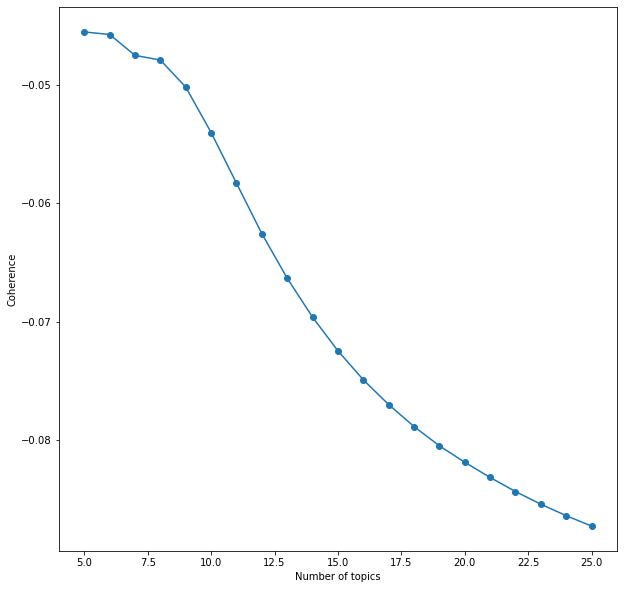

In [7]:
import matplotlib.pyplot as plt
axisy = list(range(5,26))
plt.figure(figsize=(10,10))
plt.plot(axisy,co_val,marker = 'o')
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.show()